In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style("ticks")


In [3]:
#data = pd.read_csv('extracted_log.csv')
data = pd.read_csv('extracted_log-rbm-cf_final.csv')

In [4]:
data.head(5)

,evaluate,wall_time,step,measure/reconstruction/error,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,measure/parameters/b_v/mean,measure/reconstruction_1/hamming,...,kfold-intern,batch_size,class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,path
0,0,1.550422e+09,1,0.122436,5.907176,5.125681,-0.037394,-4.359916,-0.001174,3.815010,...,0,10,RBMCF,702,500,NoRegularization-0.0,ConstantLearningRate-0.2,CD-1,1,kfold=2/kfold-intern=0/batch_size=10/class=RBM...
1,1,1.550422e+09,2,0.120661,5.980908,5.227418,-0.037773,-4.415276,-0.000415,3.472679,...,0,10,RBMCF,702,500,NoRegularization-0.0,ConstantLearningRate-0.2,CD-1,1,kfold=2/kfold-intern=0/batch_size=10/class=RBM...
2,2,1.550422e+09,3,0.119760,5.926267,4.789822,-0.039035,-4.446284,-0.000905,3.337064,...,0,10,RBMCF,702,500,NoRegularization-0.0,ConstantLearningRate-0.2,CD-1,1,kfold=2/kfold-intern=0/batch_size=10/class=RBM...
3,3,1.550422e+09,4,0.119144,5.915076,5.400952,-0.039910,-4.456356,0.000332,3.301514,...,0,10,RBMCF,702,500,NoRegularization-0.0,ConstantLearningRate-0.2,CD-1,1,kfold=2/kfold-intern=0/batch_size=10/class=RBM...
4,4,1.550422e+09,5,0.118754,5.968400,5.378855,-0.040439,-4.443341,0.000478,3.188940,...,0,10,RBMCF,702,500,NoRegularization-0.0,ConstantLearningRate-0.2,CD-1,1,kfold=2/kfold-intern=0/batch_size=10/class=RBM...


In [5]:
data.columns

Index(['evaluate', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean', 'measure/reconstruction_1/hamming',
       'details/measure/top-1/evaluate-0/train',
       'details/measure/top-1/evaluate-0/validation',
       'details/measure/top-1/evaluate-1/train',
       'details/measure/top-1/evaluate-1/validation',
       'details/measure/top-1/evaluate-2/train',
       'details/measure/top-1/evaluate-2/validation',
       'details/measure/top-1/evaluate-3/train',
       'details/measure/top-1/evaluate-3/validation',
       'details/measure/top-1/evaluate-4/train',
       'details/measure/top-1/evaluate-4/validation',
       'details/measure/top-1/evaluate-5/train',
       'details/measure/top-1/evaluate-5/validation',
       'measure/evaluate/top-1/RMSE_train',
       'measure/evaluate/top-1/RMSE_validation',
       'measure/

## RMSE

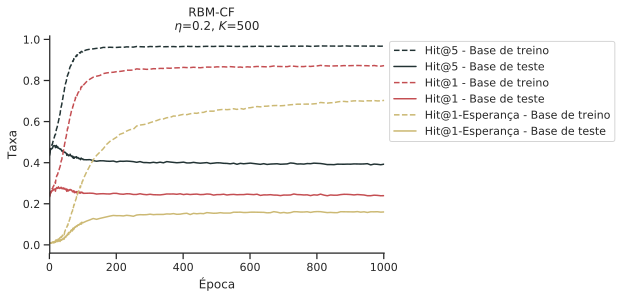

In [33]:
def filter_df(df, filters):
    '''
    results = None
    for k, v in filters.items():
        if results is None:
            results = df[k] == v
        else:
            results &= df[k] == v

    return results
    '''
    return (df[list(filters)] == pd.Series(filters)).all(axis=1)

filters = {
    'class': 'RBMCF',
    'learning_rate': 'ConstantLearningRate-0.2',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 500
}
model = 'RBMCF'

columns = [
    'measure/evaluate/top-5/train',
    'measure/evaluate/top-5/validation',
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/expectation/normalized/train',
    'measure/evaluate/expectation/normalized/validation',
]
columns_new_name = [
    'Hit@5 - Base de treino',
    'Hit@5 - Base de teste',
    'Hit@1 - Base de treino',
    'Hit@1 - Base de teste',
    'Hit@1-Esperança - Base de treino',
    'Hit@1-Esperança - Base de teste',
]
colors=['#223334', '#223334', 'r', 'r', 'y', 'y']
styles=['--', '-', '--', '-', '--', '-']

result = data[filter_df(data, filters)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('RBM-CF')
ax.set_title(r'$\eta$=0.2, $K$=' + str(filters['hidden_size']));
ax.set_xlabel('Época')
ax.set_ylabel('Taxa');
sns.despine();
ax.get_figure().savefig("rbm-cf-metricas.pdf", bbox_inches='tight')

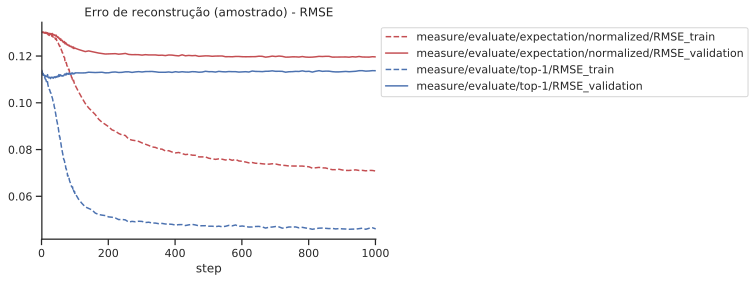

In [15]:
columns = [
    'measure/evaluate/expectation/normalized/RMSE_train',
    'measure/evaluate/expectation/normalized/RMSE_validation',
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    'measure/evaluate/top-1/RMSE_train',
    'measure/evaluate/top-1/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]

styles=['r--', 'r', 'b--', 'b', ]

ax = data[filter_df(data, filters)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Erro de reconstrução (amostrado) - RMSE');
sns.despine();

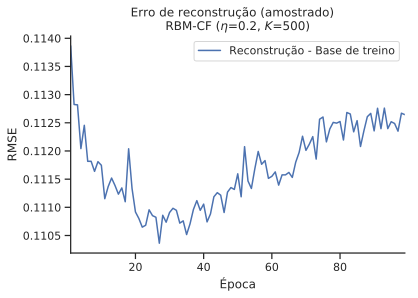

In [35]:
columns = [
    'measure/evaluate/top-1/RMSE_validation',
]
columns_new_name = [
    'Reconstrução - Base de treino'
]

colors=['b']
styles=['-']

result = data[filter_df(data, filters) & (data['step']<100)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('Erro de reconstrução (amostrado)')
ax.set_title(r'RBM-CF ($\eta$=0.2, $K$=' + str(filters['hidden_size']) + ')');
ax.set_xlabel('Época')
ax.set_ylabel('RMSE');
sns.despine();
ax.get_figure().savefig("rbm-cf-reconstrucao.pdf", bbox_inches='tight')

# Best hyperparameters

In [10]:
def evaluate(column):
    parameters = ['class', 'hidden_size', 'learning_rate', 'kfold', 'kfold-intern']

    result = data \
        .groupby(parameters).max(level=column) \
        .groupby(parameters[:-1]).mean() \
        .groupby(parameters[:-2]).mean()[[column]].reset_index()
    
    result.rename(columns={column: 'mean'}, inplace=True)
    result['type'] = column
    return result

columns_evaluated = ['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/top-5/validation', 'measure/evaluate/top-1/validation']

evaluation = pd.concat([evaluate(column) for column in columns_evaluated])
evaluation.head(3)
#print(accuracy.max(), accuracy.max().index)

,class,hidden_size,learning_rate,mean,type
0,RBMCF,500,ConstantLearningRate-0.2,0.167990,measure/evaluate/expectation/normalized/valida...
0,RBMCF,500,ConstantLearningRate-0.2,0.491844,measure/evaluate/top-5/validation
0,RBMCF,500,ConstantLearningRate-0.2,0.287963,measure/evaluate/top-1/validation


In [11]:
print("WRONG!!!")
evaluation.groupby(['type', 'class']).max().sort_values('mean', ascending=False)


WRONG!!!


,,hidden_size,learning_rate,mean
type,class,,,
measure/evaluate/top-5/validation,RBMCF,500,ConstantLearningRate-0.2,0.491844
measure/evaluate/top-1/validation,RBMCF,500,ConstantLearningRate-0.2,0.287963
measure/evaluate/expectation/normalized/validation,RBMCF,500,ConstantLearningRate-0.2,0.167990


In [12]:
print('CORRECT!')

best_results = evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate']).max()
best_results.reset_index()\
    .sort_values('mean', ascending=False)\
    .drop_duplicates(['type', 'class'])\
    .set_index(['type', 'class'])
#best_results
#best_results#.idxmax()
#evaluation.groupby(['type', 'class']).max()

CORRECT!


,,hidden_size,learning_rate,mean
type,class,,,
measure/evaluate/top-5/validation,RBMCF,500,ConstantLearningRate-0.2,0.491844
measure/evaluate/top-1/validation,RBMCF,500,ConstantLearningRate-0.2,0.287963
measure/evaluate/expectation/normalized/validation,RBMCF,500,ConstantLearningRate-0.2,0.167990


In [11]:
evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate'])\
    .max()\
    .reset_index()\
    .pivot_table(index=['type', 'class', 'learning_rate'], columns=['hidden_size'])

mean  \
hidden_size                                                                             100    
type                                               class learning_rate                         
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.01  0.069885   
                                                         ConstantLearningRate-0.05  0.068611   
                                                         ConstantLearningRate-0.1   0.081819   
                                                   RBMCF ConstantLearningRate-0.05  0.122763   
                                                         ConstantLearningRate-0.1   0.148219   
                                                         ConstantLearningRate-0.2   0.158949   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.01  0.257946   
                                                         ConstantLearningRate-0.05  0.218056   
                                                         ConstantLearningRate-0.1   0.192223   
                                                   RBMCF ConstantLearningRate-0.05  0.261543   
                                                         ConstantLearningRate-0.1   0.259193   
                                                         ConstantLearningRate-0.2   0.263605   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.01  0.446971   
                                                         ConstantLearningRate-0.05  0.389065   
                                                         ConstantLearningRate-0.1   0.382700   
                                                   RBMCF ConstantLearningRate-0.05  0.446816   
                                                         ConstantLearningRate-0.1   0.448593   
                                                         ConstantLearningRate-0.2   0.450285   

                                                                                              \
hidden_size                                                                             500    
type                                               class learning_rate                         
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.01  0.037323   
                                                         ConstantLearningRate-0.05  0.069446   
                                                         ConstantLearningRate-0.1   0.113220   
                                                   RBMCF ConstantLearningRate-0.05  0.093403   
                                                         ConstantLearningRate-0.1   0.133185   
                                                         ConstantLearningRate-0.2   0.155938   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.01  0.252939   
                                                         ConstantLearningRate-0.05  0.262967   
                                                         ConstantLearningRate-0.1   0.225576   
                                                   RBMCF ConstantLearningRate-0.05  0.262681   
                                                         ConstantLearningRate-0.1   0.261607   
                                                         ConstantLearningRate-0.2   0.271282   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.01  0.430295   
                                                         ConstantLearningRate-0.05  0.452435   
                                                         ConstantLearningRate-0.1   0.438126   
                                                   RBMCF ConstantLearningRate-0.05  0.451206   
                                                         ConstantLearningRate-0.1   0.459588   
                                                         ConstantLearningRate-0.2   0.467003   

                                                      

# Individual analisys

In [12]:
#columns = [f'details/measure/expectation/normalized/evaluate-{i}/validation' for i in range(6)]
columns = [f'details/measure/top-5/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/expectation/normalized/train', 'measure/evaluate/expectation/normalized/validation'] \
             + ['measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']

data[data["class"] == 'RBMCF'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            4547
details/measure/top-5/evaluate-1/validation            7172
details/measure/top-5/evaluate-2/validation           12224
details/measure/top-5/evaluate-3/validation           10102
details/measure/top-5/evaluate-4/validation            1112
details/measure/top-5/evaluate-5/validation            3435
measure/evaluate/expectation/normalized/train          5246
measure/evaluate/expectation/normalized/validation    17977
measure/evaluate/top-1/validation                     10505
measure/evaluate/top-5/validation                     10306
dtype: int64

kfold=2/kfold-intern=1/batch_size=10/class=RBMCF/visible_size=702/hidden_size=100/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.2/sampling_method=CD-1/momentum=1/1542855678.6966267/events.out.tfevents.1542855682.paulo-notebook


Text(0.5, 1.0, 'RBM-CF - Best validation performance')

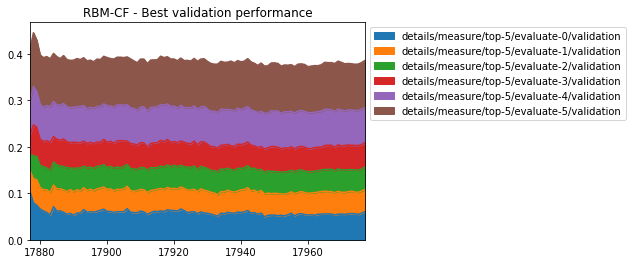

In [13]:
detail_filter = data.iloc[17977].path

print(detail_filter)
#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [14]:
data[data["class"] == 'RBM'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            1818
details/measure/top-5/evaluate-1/validation             405
details/measure/top-5/evaluate-2/validation            4451
details/measure/top-5/evaluate-3/validation            5966
details/measure/top-5/evaluate-4/validation             305
details/measure/top-5/evaluate-5/validation            2122
measure/evaluate/expectation/normalized/train         11407
measure/evaluate/expectation/normalized/validation    11406
measure/evaluate/top-1/validation                      1819
measure/evaluate/top-5/validation                      5758
dtype: int64

kfold=4/kfold-intern=0/batch_size=10/class=RBM/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.1/sampling_method=CD-1/momentum=1/1542903493.2974353/events.out.tfevents.1542903497.ff69adec0143


Text(0.5, 1.0, 'RBM - Best validation performance')

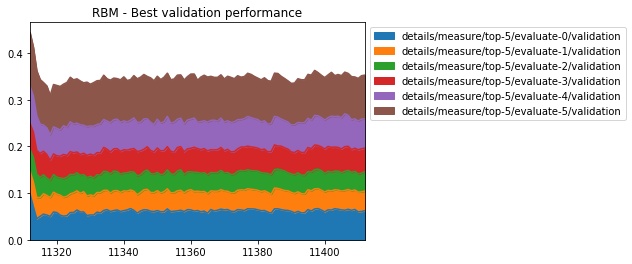

In [15]:
detail_filter = data.iloc[11406].path

print(detail_filter)
#ax = data[data['path'].str.contains(detail_filter)][columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [16]:
#data[(data["class"] == 'RBM') & (data['path'].str.contains('id=50'))][full_columns].idxmax()

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

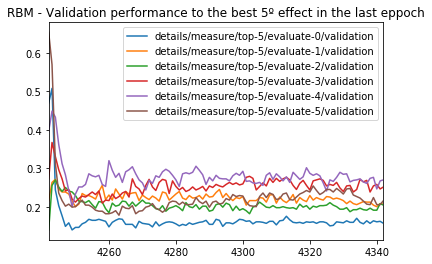

In [17]:
detail_filter = data.iloc[4278].path[7:]

ax = data[data['path'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')